# Jupyter + IPython Basics

## 1) What is Jupyter?
Jupyter is an **interactive computing environment** that lets you combine:

- **Code**
- **Output**
- **Text explanation**
- **Visualizations**

…in a single document.

It supports the idea of **literate programming**:

> Code and explanation should live together.

### Notebook files are `.ipynb`
A Jupyter Notebook file (`.ipynb`) is **not just a Python script**.

It is a structured document, stored as a **JSON file**, which can contain:
- code cells
- markdown cells
- outputs (tables, plots, printed text)
- metadata (kernel info, tags, etc.)

### What does “Notebook = JSON document” mean?
If you open a `.ipynb` file in a text editor, you’ll see **JSON** (a structured text format) like:

```json
{
  "cells": [
    {
      "cell_type": "code",
      "execution_count": 3,
      "source": ["print('hello')"],
      "outputs": [...]
    }
  ]
}
```

**Implications:**
- The notebook stores **both code and results**
- Outputs can make files **large**
- Git diffs can be **noisy** (because outputs are inside the JSON)

## Simple Example (Jupyter)
In a notebook code cell, run:
```python
print("Hello world")
```
The output appears immediately below.

In [1]:
print("Hello world")

Hello world


Compare to a Python script:
```bash
python file.py
```
Output appears in the terminal.

---
## 2) What is IPython?
IPython stands for:

> **Interactive Python**

It is an enhanced Python interpreter that provides:
- Tab completion
- Magic commands
- Command history
- Shell access
- Better tracebacks and debugging support

**Jupyter uses IPython** as its Python execution engine (kernel).

### IPython “magics” (special commands)
Magics are commands that begin with `%` (line magic) or `%%` (cell magic).  
They are **not normal Python syntax**.

Example:
```python
%timeit sum(range(100000))
```

In [8]:
%timeit sum(range(100000))

798 µs ± 3.69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Another example:
```python
%who
```
Shows variables defined in the current kernel session.

In [9]:
x = 10
y = "hi"
%who

a	 plt	 x	 y	 


```python
%history
```
Shows command history

In [10]:
%history -n 1-5

   1: print("Hello world")
   2: %timeit sum(range(100000))
   3:
x = 10
y = "hi"
%who
   4: x = 10
   5: x + 5


%pwd and %cd

Work with file system inside notebook

In [11]:
%pwd

'/Users/haibinglu/Documents/data-science-python/week1'

In [12]:
%cd

/Users/haibinglu


%run

Run a Python script inside notebook.

In [15]:
%ls

Applications/ Documents/    Library/      Music/        Public/
Desktop/      Downloads/    Movies/       Pictures/     jupyter.log


> %run /full/path/to/myscript.py

In [19]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/haibinglu


---
## 3) How Jupyter Works (Simple Model)
Think of Jupyter as a client–server system:

**Browser UI (frontend)**  
↓ sends code to  
**Kernel (backend process)**  
↓ returns results to  
**Browser UI**  
…and the notebook file stores the content + outputs in JSON.

### What is a “kernel” (Python, R, Julia)?
A **kernel** is the language runtime that executes your code.

Common kernels include:
- **Python** (IPython kernel)
- **R**
- **Julia**
- (and many others, including Spark-based kernels)

When you choose: **Kernel → Change Kernel**, you’re choosing which language runs your notebook.

**Key point:** the kernel is a **separate process** that holds memory (variables, imported modules, data in RAM).  
If the kernel restarts, your variables disappear.

---
## 4) Statefulness (and why it can be dangerous)
Notebooks are **stateful**: the kernel keeps variables in memory across cells.

### Example: state persists across cells
Cell 1:
```python
x = 10
```
Cell 2:
```python
x + 5
```
This works because the kernel remembers `x`.

### Live demo: run these two cells in order

In [4]:
x = 10

In [5]:
x + 5

15

### What happens if you restart the kernel?
If you restart the kernel and run only the second cell, it fails because `x` no longer exists.

**This is the #1 cause of confusing notebook bugs.**

---
## 5) Execution order problem (basic warning)
The number like `In [12]` is the **execution count**, not the position in the notebook.

You can run cells out of order, which can create **hidden state** problems.

### Example: running a cell multiple times changes results
If you run the next cell repeatedly, the output keeps changing because the variable updates in memory.

In [ ]:
a = 5
a = a + 1
a

6

If you run the cell above again, `a` increases again.

### Professional habit (non-negotiable)
Before submitting or presenting:

**Kernel → Restart → Run All**

If it doesn’t run top-to-bottom cleanly, it’s not reliable.

---
## 6) Simple visualization example
One reason notebooks are popular is that plots render inline.

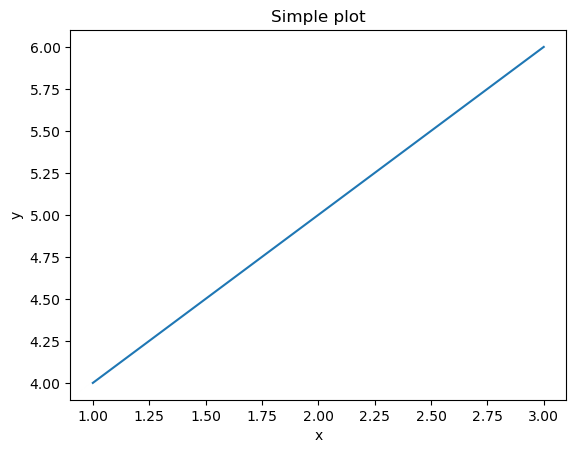

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1,2,3],[4,5,6])
plt.title("Simple plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---
## 7) Code cells vs Markdown cells
### Code cells
- Sent to the kernel
- Executed
- Produce output
- Change kernel state (variables)

### Markdown cells
- Rendered text in the browser
- Not executed by the kernel
- Used for explanation, structure, and math

---
## 8) Markdown Basics

Markdown allows you to write using an easy-to-read, easy-to-write plain text format, then convert it to structurally valid HTML.

Reference: https://daringfireball.net/projects/markdown/

### Markdown

Headings

# heading 1
## heading 2
### heading 3'

Bullet Lists

- item 1
- item 2
- item 3

Numbered Lists

1. First
2. Second
3. Third

Bold & Italic

**Bold**
*Italic*

Inline Code

Use `print()` to display output.

Code Blocks

```python
def hello():
    print("hello")


### Example math (LaTeX):

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Math symbol reference: https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf

### Example HTML

<p>My Puppy</p>
<img width="100px" src="https://images.unsplash.com/photo-1507146426996-ef05306b995a?fm=jpg&q=60&w=3000&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8cHVwcHl8ZW58MHx8MHx8fDA%3D">

HTML tag reference: https://www.w3schools.com/TAGS/default.asp

---
## Summary
- **Jupyter**: interactive document (code + output + narrative), stored as JSON.
- **IPython**: enhanced interactive Python engine with magics and better tooling.
- **Kernel**: separate process that executes code and holds memory.
- **Statefulness** is powerful but risky; avoid hidden state.
- Always validate with **Restart & Run All**.
- A professional notebook should:
    -  Run cleanly from top to bottom  
    - Use clear headings  
    - Separate EDA vs modeling vs evaluation  
    - Avoid hidden state  
    - Avoid massive output clutter  
    - Use functions instead of long procedural code  
    - Include explanation before code  - 